In [1]:
from shapely.geometry import Point, GeometryCollection, MultiPolygon, Polygon
from model.RegionsCalcs import create_regions
from model.RegionsPlotter import standard_plot
import numpy as np
from model.NetworkGraph import CompleteGraph
from model.NodeClass import Node
from model.LinkClass import Link
from model.NetworkGraphPlots import NodeDegreeHeatMapPlot
from numpy import random
import matplotlib.pyplot as plt

In [2]:
# Import the network
graph = CompleteGraph.of_sources("../Passion_Xtreme_III.mat", "../NameTypes.xlsx")

Discarded nodes: 39
Discarded links: 0
Links: 174
Nodes: 154

*-*-* Printing information about the imported network *-*-*

Num nodes: 154
Num links: 174
Num HL4: 20
Num HL5: 134
Average distance: 2.58
Max distance (km): 22.00
Min distance (km): 0.18
Average degree: 2.27
Min degree: 1
Max degree: 10
Average degree HL4: 1.95
Average degree HL5: 2.32
Total bidirectional link length (km): 448.84


In [3]:
# Common scenario for both cases
# Params
scaling_factor = 1  # No scaling
p_tx_macro = 40     # W
p_tx_fem = 10       # W
alpha_loss = 4      # dB
def_max_rad = 0.5     # km
prob_fem = 1


cells = []
cells_max_radius = []
assocciated_nodes = []
for node in graph.nodes:
    if node.type == "HL5":
        assocciated_nodes.append(node)


assocciated_nodes = sorted(assocciated_nodes, key=lambda x: x.type == "HL4", reverse=True)
for node in assocciated_nodes:
    if node.type == "HL4":
        cells.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, p_tx_macro))
    else:
        cells.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, p_tx_fem))
        cells_max_radius.append(def_max_rad)


base_area = [(x * scaling_factor, y * scaling_factor) for x, y in graph.network_polygon_bounds]
print(base_area)

[(0.0, 0.0), (0.0, 35.57836559188485), (34.593073727138425, 35.57836559188485), (34.593073727138425, 0.0), (0.0, 0.0)]


# Case 1: Try with power-based radius

In [4]:

regions = create_regions(
    np.array(cells),
    alpha_loss, 
    polygon_bounds=base_area,
    euclidean_to_km_scale=scaling_factor,
)

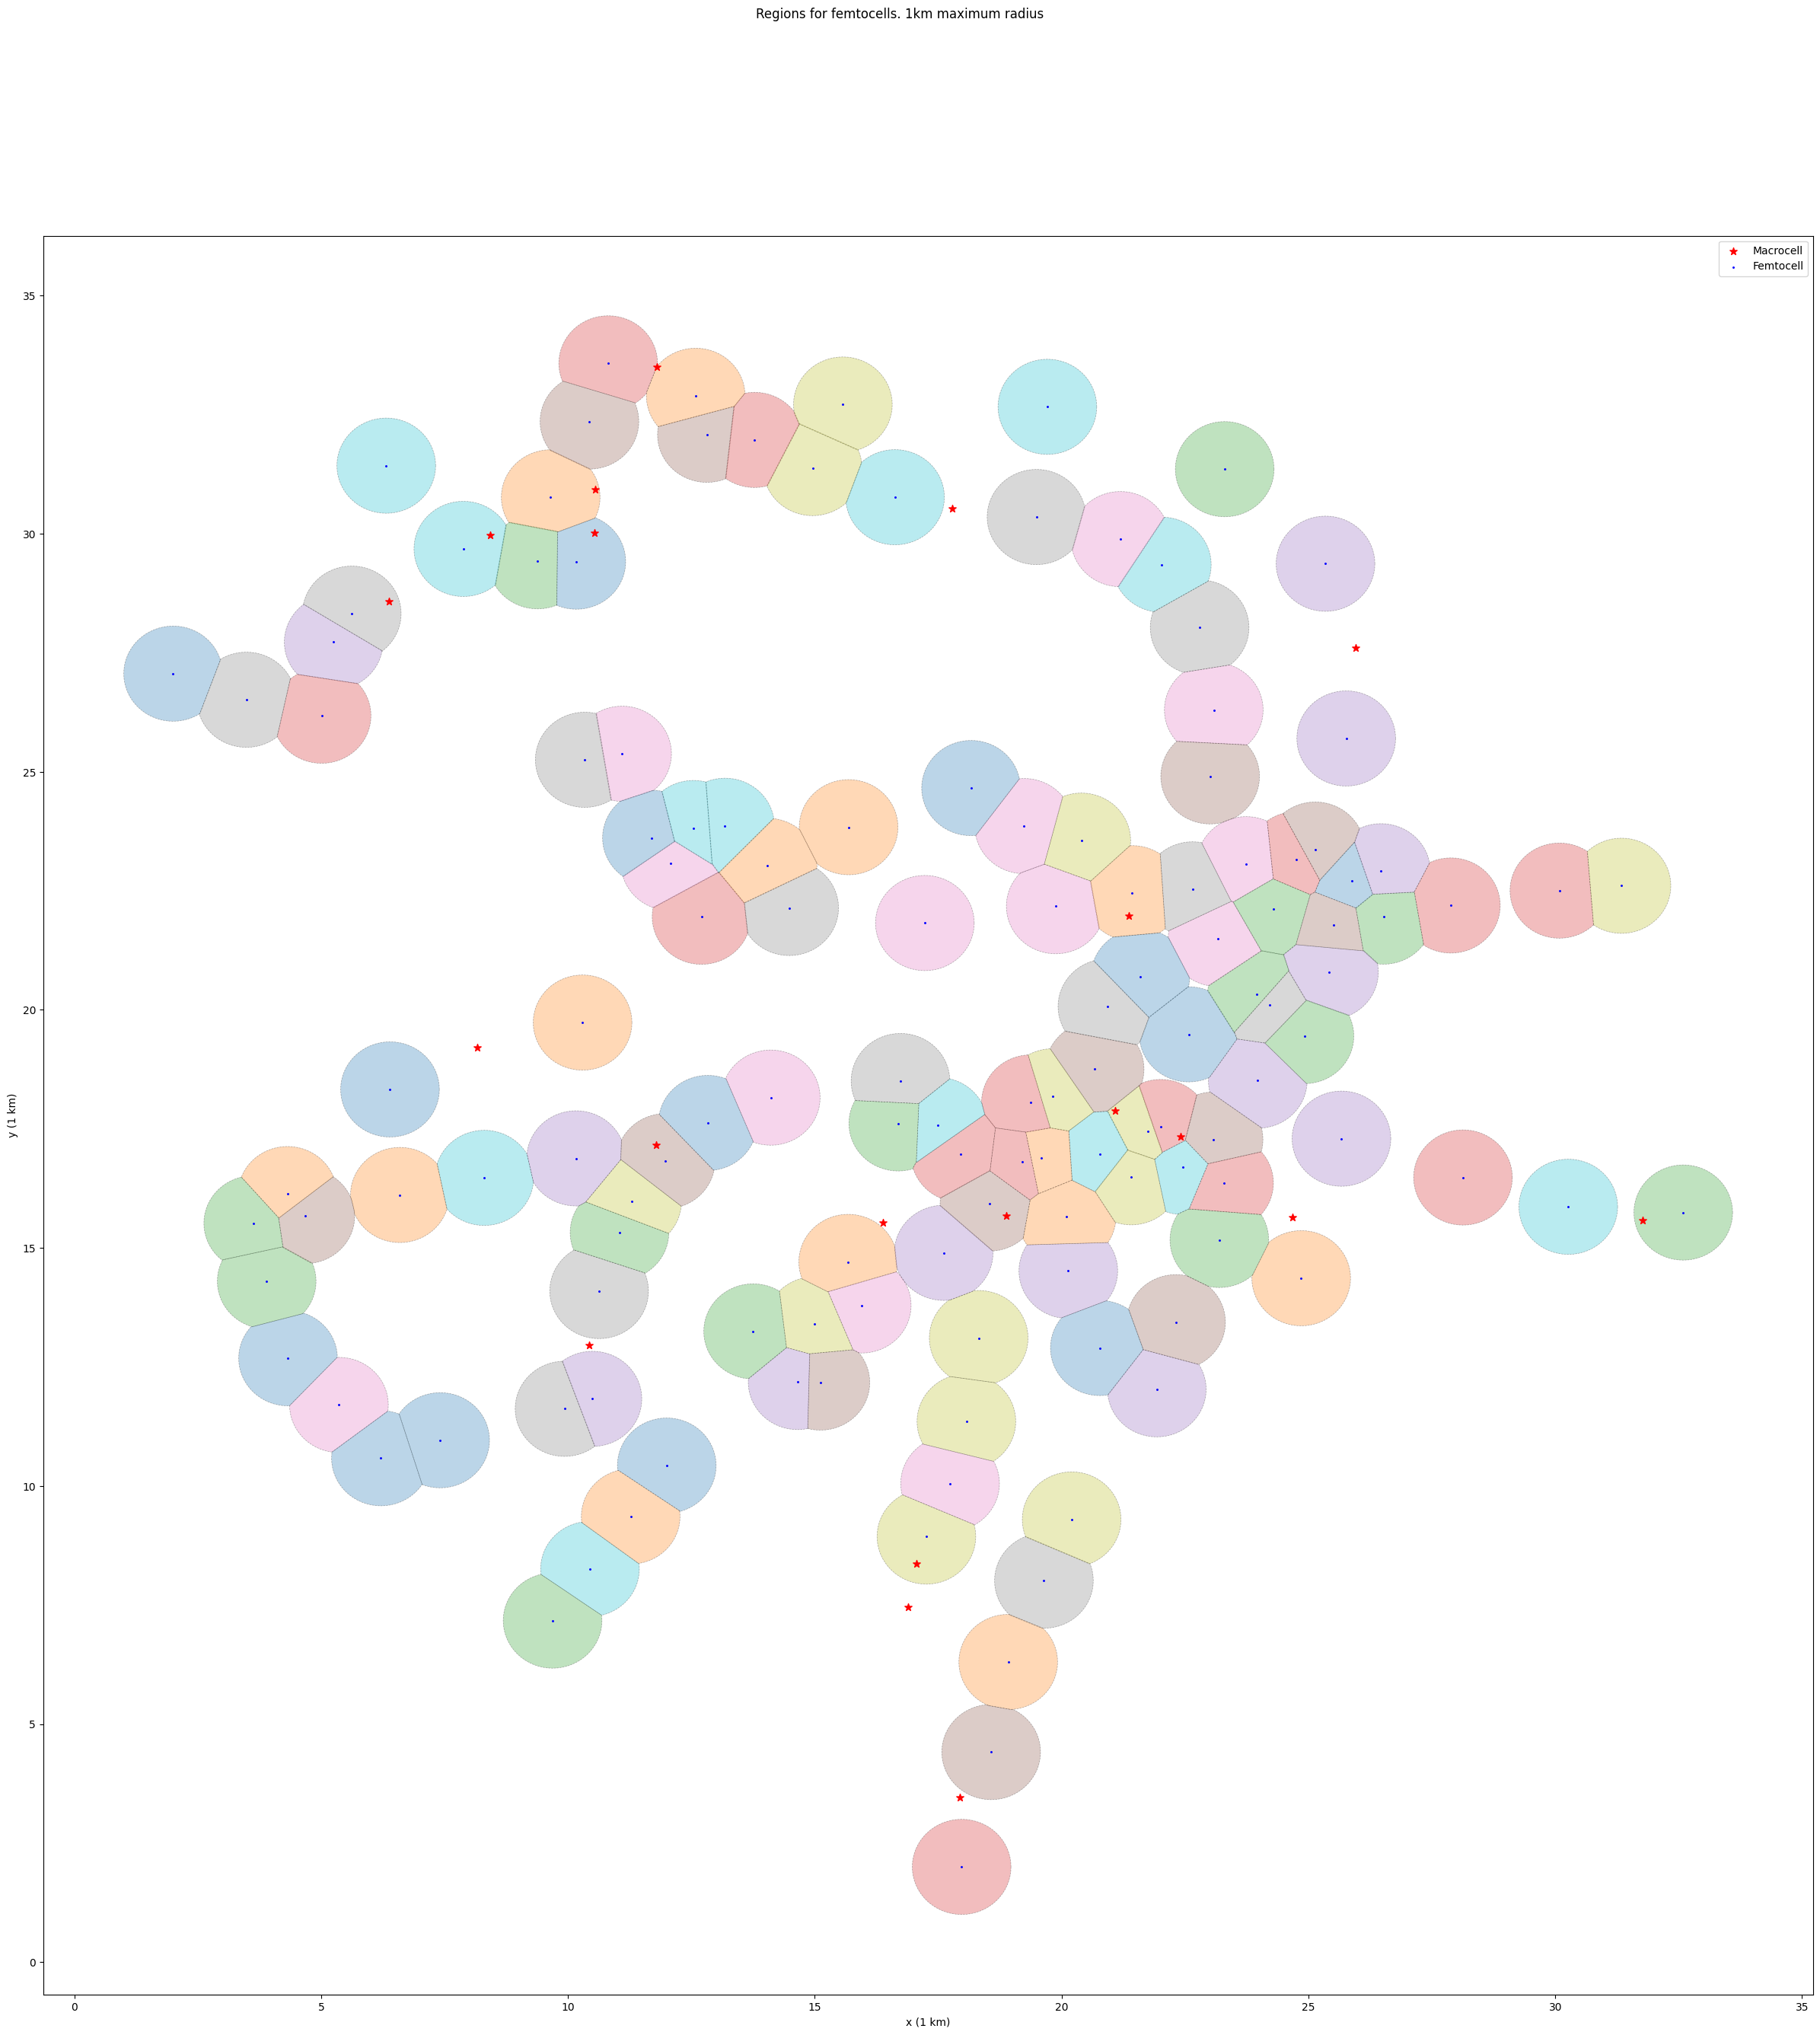

(<Figure size 3000x3000 with 1 Axes>,
 <Axes: xlabel='x (1 km)', ylabel='y (1 km)'>)

In [5]:
standard_plot(
    regions, 
    graph.nodes, 
    scaling_factor, 
    femtocell_config={"marker": ".", "s": 5},
    plot_config={"title": "Regions for femtocells. 1km maximum radius", "figsize": (30, 30)},
)

# Case 2: Try with max-distance based radius

In [6]:
regions_2 = create_regions(
    np.array(cells),
    alpha_loss, 
    polygon_bounds=base_area,
    euclidean_to_km_scale=scaling_factor,
    max_radius_km_list=cells_max_radius,
)

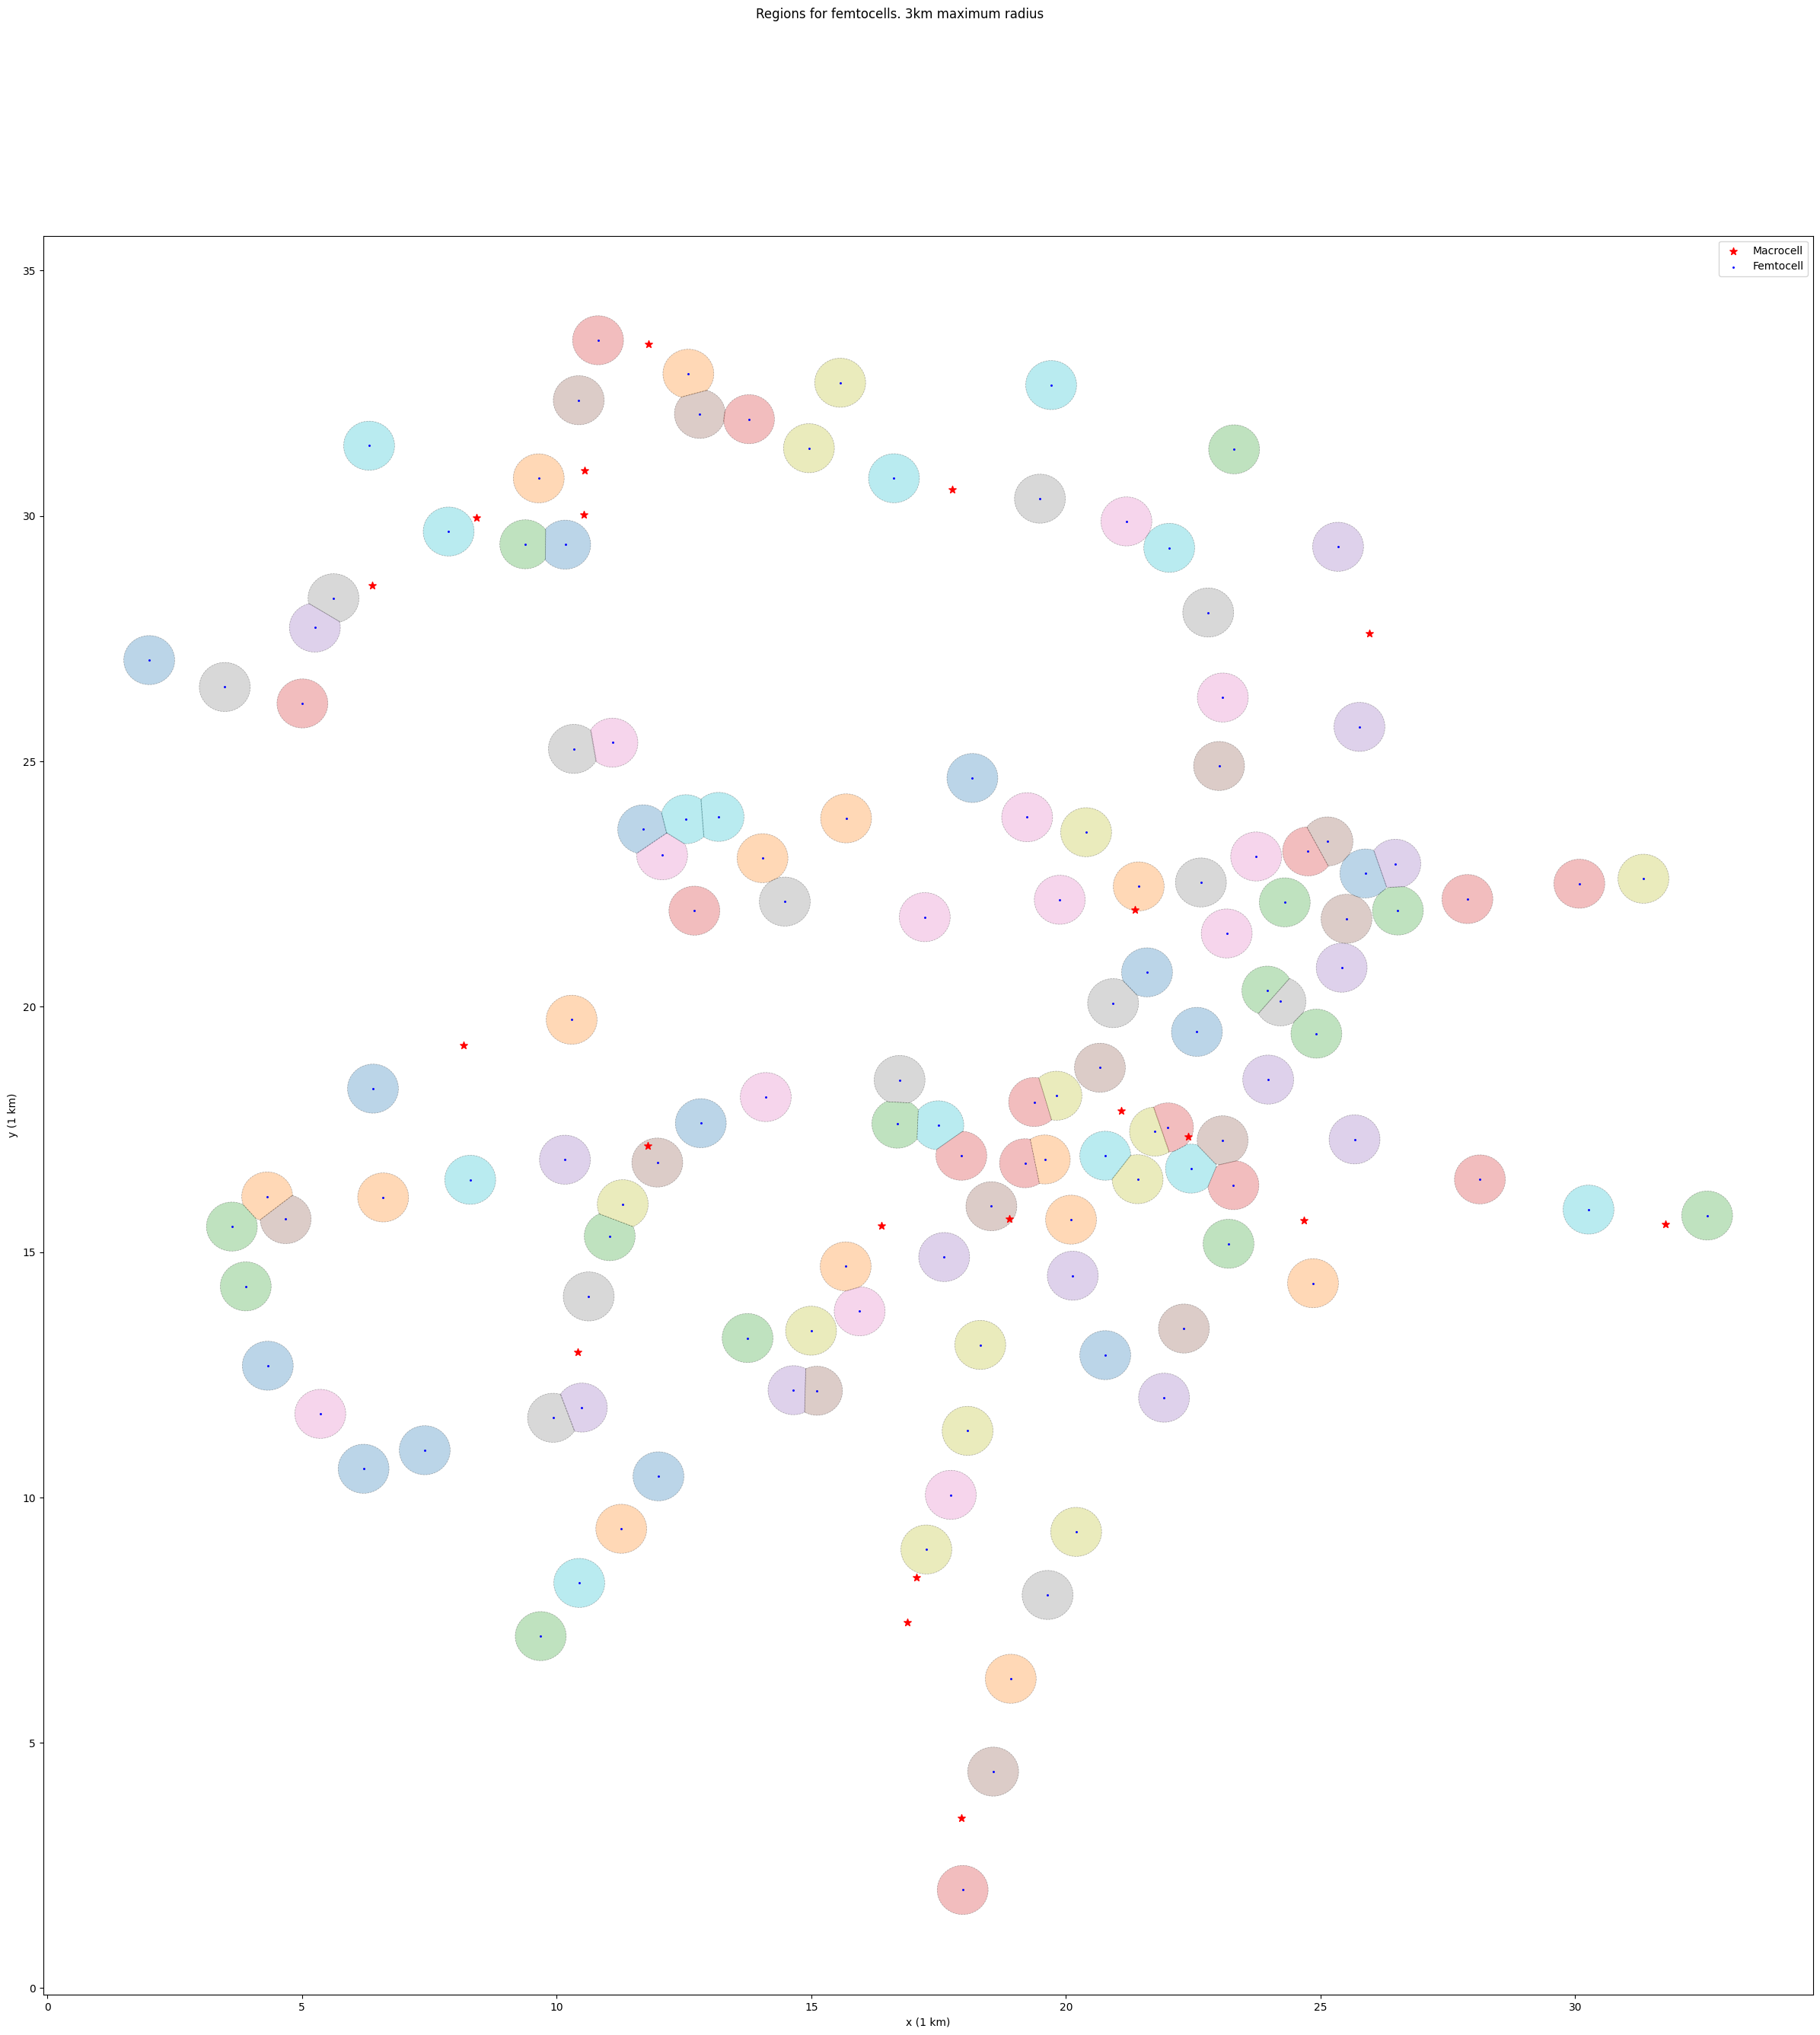

In [7]:
fig, ax = standard_plot(
    regions_2, 
    graph.nodes, 
    scaling_factor,
    femtocell_config={"marker": ".", "s": 5},
    plot_config={"title": "Regions for femtocells. 3km maximum radius", "figsize": (30, 30)},
)

/home/elig/Documents/GitHub/PoF_Simulator/model/NetworkGraphPlots.py:97: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([a[0], b[0]], [a[1], b[1]], edge_style, lw=edge_width, color=edge_color)


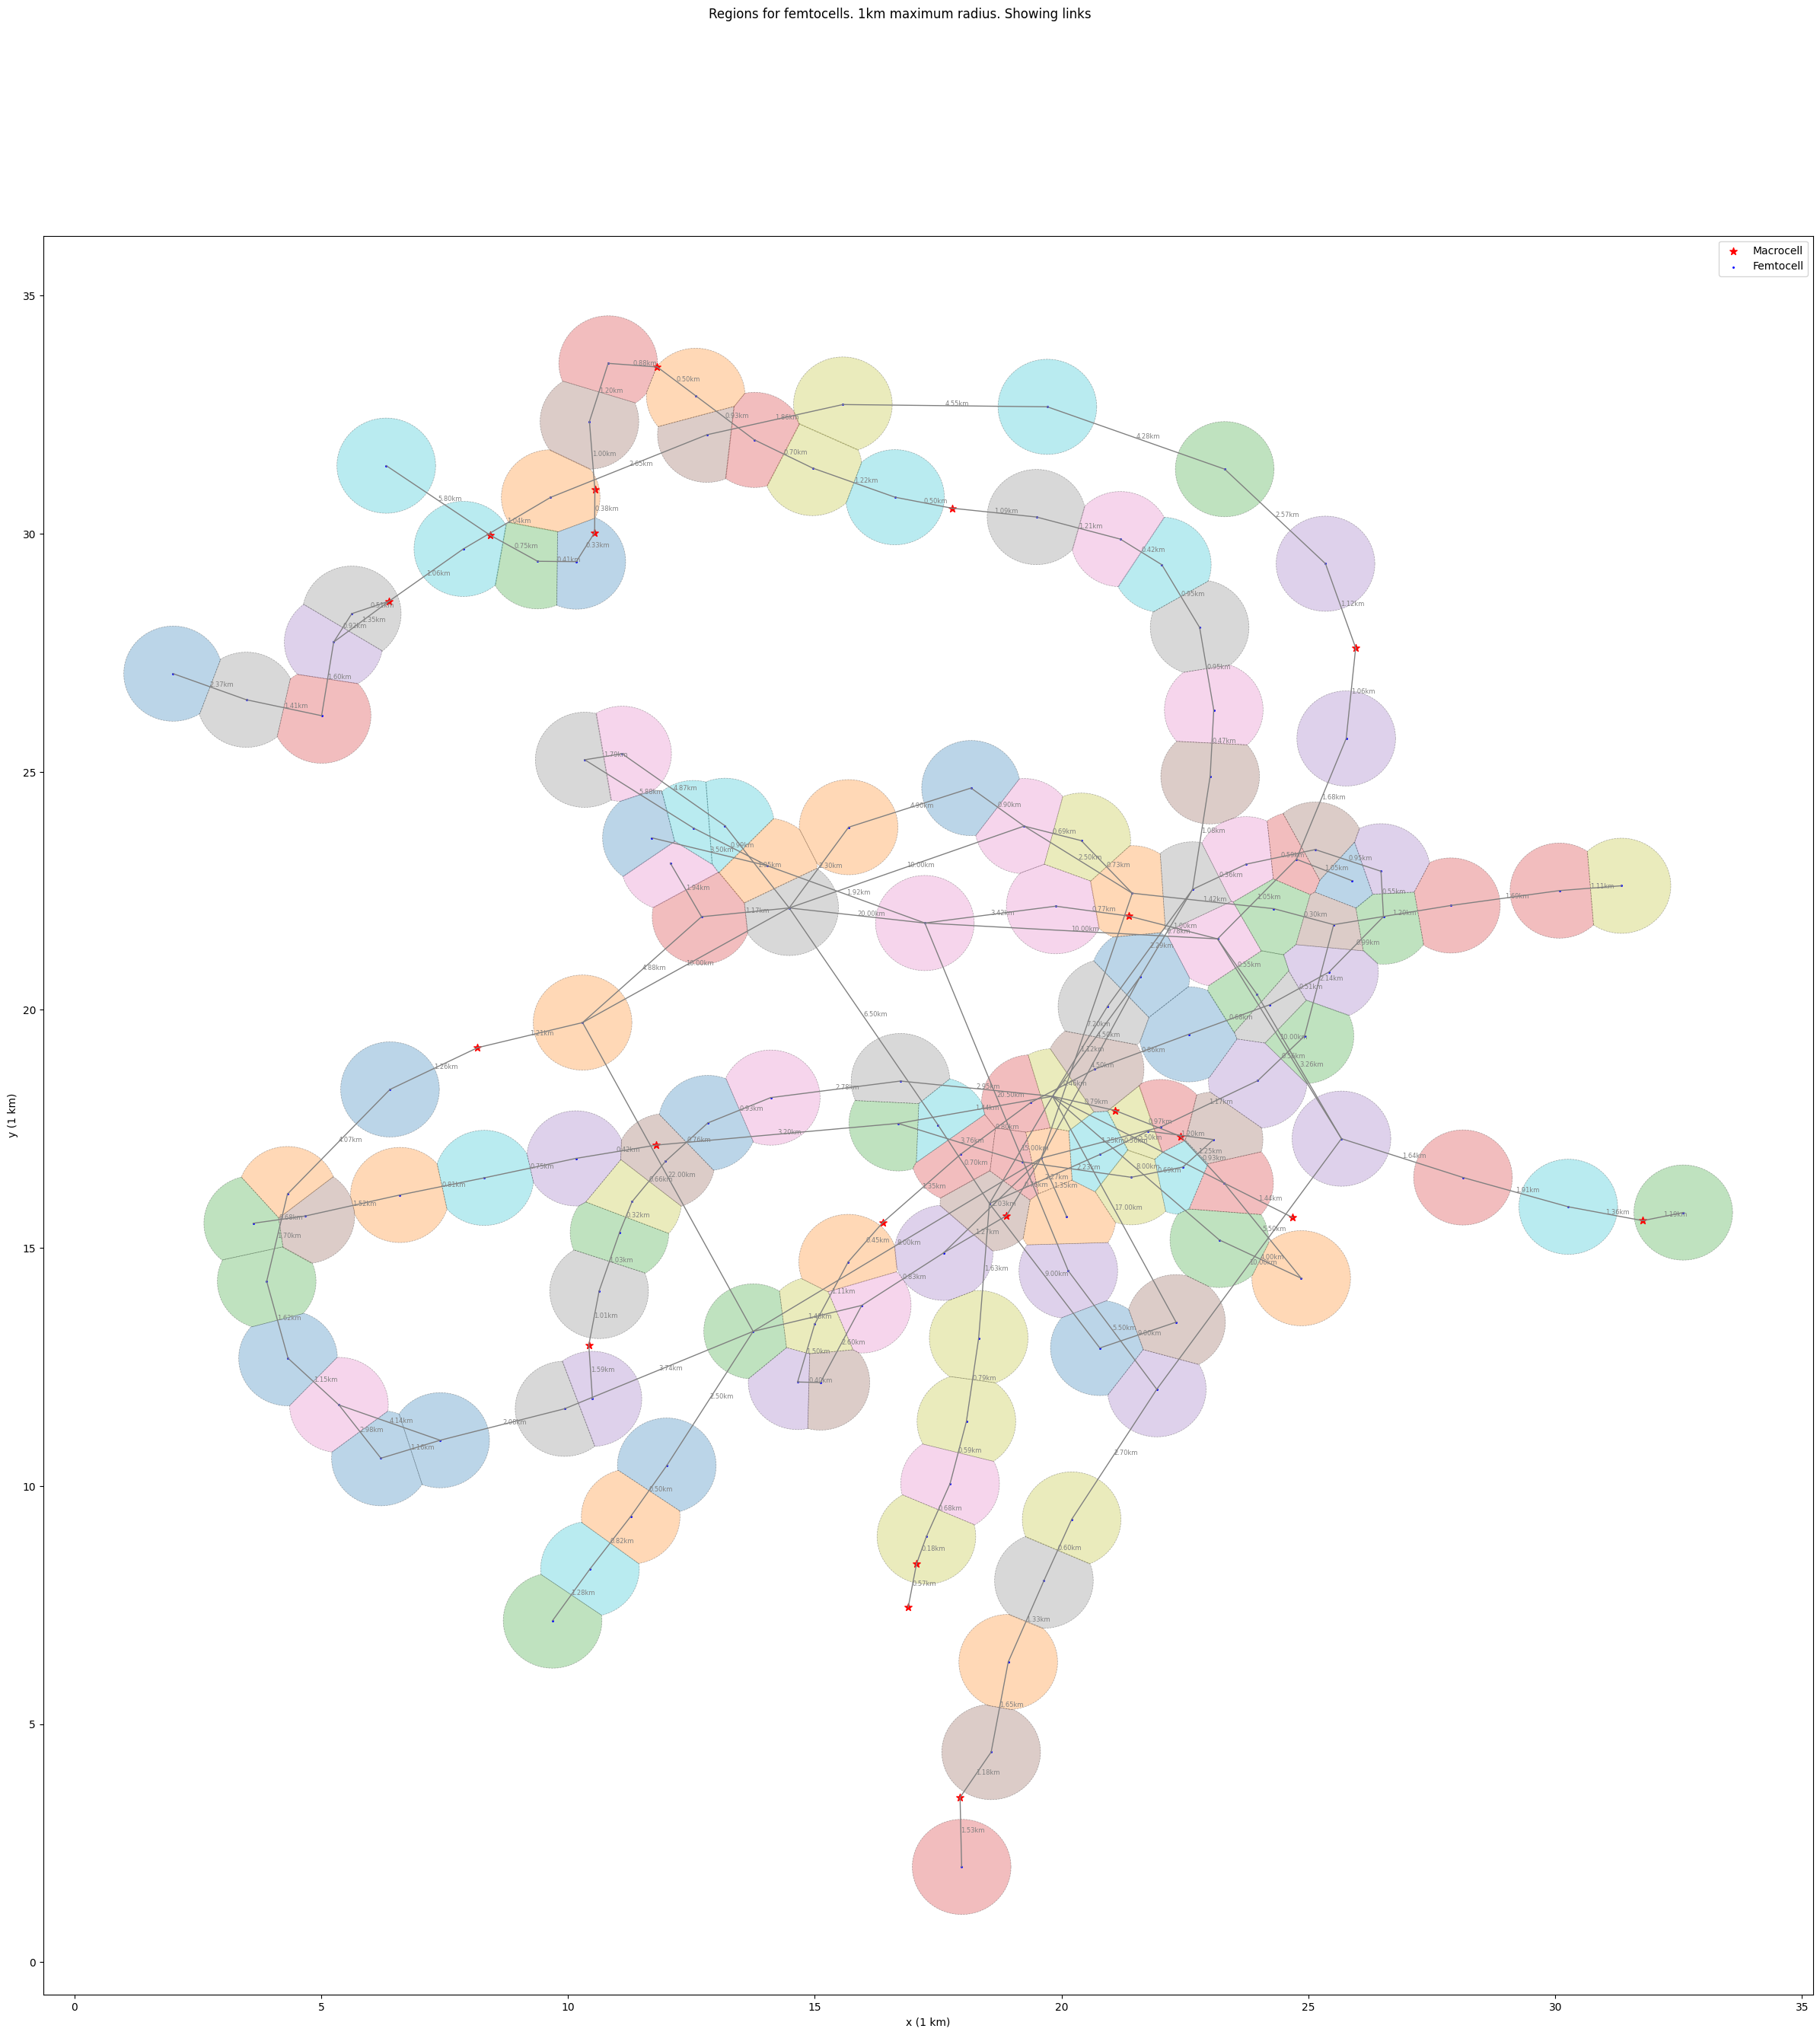

(<Figure size 3000x3000 with 1 Axes>,
 <Axes: xlabel='x (1 km)', ylabel='y (1 km)'>)

In [8]:
def callable_plotter(fig, ax):
    return NodeDegreeHeatMapPlot.plot_links(graph.links, fig, ax)

standard_plot(
    regions, 
    graph.nodes, 
    scaling_factor, 
    extra_plot_functions=[callable_plotter],
    femtocell_config={"marker": ".", "s": 5},
    plot_config={"title": "Regions for femtocells. 1km maximum radius. Showing links", "figsize": (30, 30)},
)

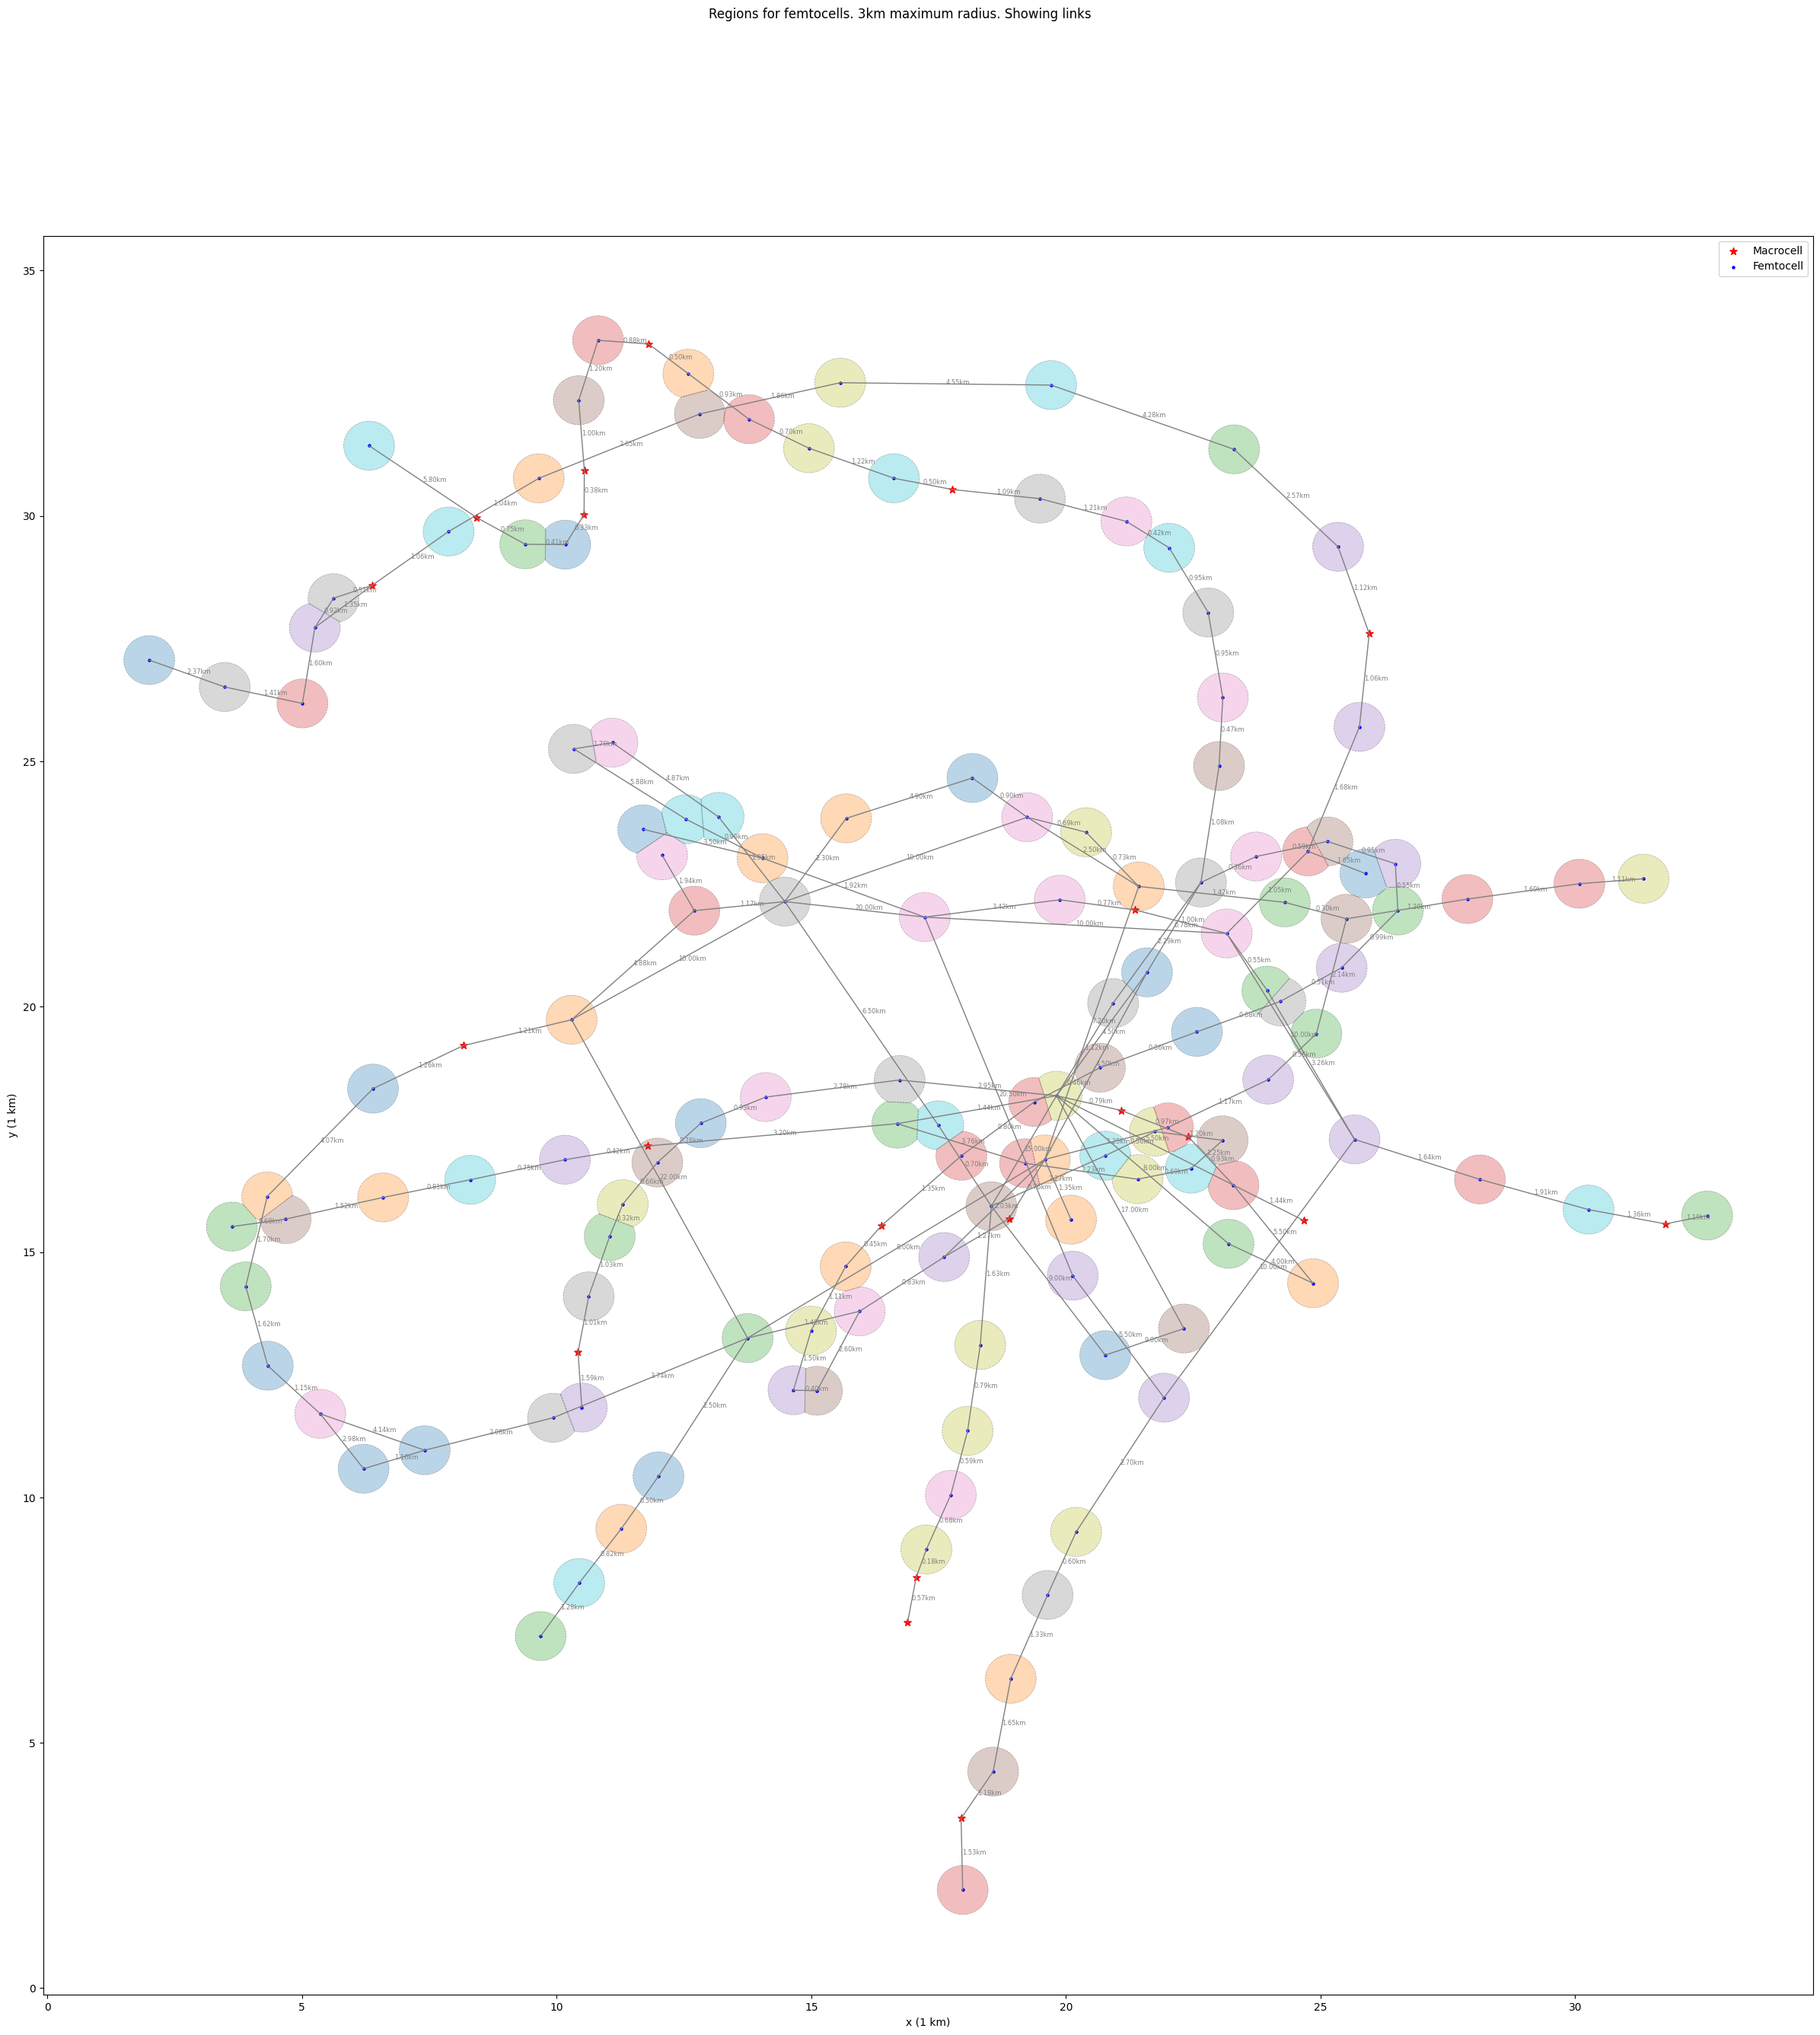

(<Figure size 3000x3000 with 1 Axes>,
 <Axes: xlabel='x (1 km)', ylabel='y (1 km)'>)

In [9]:
def callable_plotter(fig, ax):
    return NodeDegreeHeatMapPlot.plot_links(graph.links, fig, ax)

standard_plot(
    regions_2, 
    graph.nodes, 
    scaling_factor, 
    extra_plot_functions=[callable_plotter],
    femtocell_config={"marker": "o", "s": 5},
    plot_config={"title": "Regions for femtocells. 3km maximum radius. Showing links", "figsize": (30, 30)},
)